In [62]:
import pandas as pd 
import numpy as np 
import scipy
# import xlrd 
import sklearn

from Gibbs_model_probit import Gibbs_sampling

from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from utils import baseline_lr,baseline_esnet,baseline_justmean
from utils import baseline_LogitElsnet,baseline_justmode,baseline_random,baseline_LogitLR,baseline_RanForest,baseline_Gibbs_zhe,baseline_SVM
from utils import baseline_LogitElsnet_leaveone,baseline_LogitLR_leaveone,baseline_SVM_leaveone
from utils import logis_regression_5
from sklearn.model_selection import KFold
from scipy.stats import binom 
from scipy.stats import norm
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from tqdm import trange
from Gibbd_zhe import GibbsSampling3
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import LeaveOneOut
import time
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression

In [63]:
# data_loading 
np.random.seed(123)

# data_table = pd.read_csv('../data/processed/all_feature_p1_lip_total_single.csv')
data_table_cont = pd.read_csv('../data/processed/all_feature_p2_spicie_cont_single.csv')
data_table_binary = pd.read_csv('../data/processed/all_feature_p2_spicie_binary_single.csv')

target = '1= death; 0=alive'#'gap_surv_time_class' 'ADT_if_fail'


In [64]:
data_table_cont

,Patient_ID,lip_P2_Sph_Sph(d16:1),lip_P2_Sph_Sph(d18:1),lip_P2_Sph_Sph(d18:2),lip_P1_Cer_Cer(d16:1/16:0),lip_P2_Cer_Cer(d16:1/16:0),lip_P1_Cer_Cer(d16:1/18:0),lip_P2_Cer_Cer(d16:1/18:0),lip_P1_Cer_Cer(d16:1/20:0),lip_P2_Cer_Cer(d16:1/20:0),...,lip_P1_TG(O) [NL]_TG(O-54:3) [NL-18:1],lip_P1_TG(O) [NL]_TG(O-54:4) [NL-17:1],lip_P1_TG(O) [NL]_TG(O-54:4) [NL-18:2],lip_signature,gene_P2_AR_Amp,gene_P2_RB1_Del,gene_P2_TP53_SNP,gap_death_consent,1= death; 0=alive,gap_surv_time_class
0,1001,0.495112,0.054354,0.216575,0.294450,0.294450,0.305661,0.305661,0.181769,0.181769,...,0.091286,0.057364,0.170173,0.291482,0,0,0,2062,1.0,1
1,1010,0.400186,0.137942,0.276835,0.240365,0.240365,0.223917,0.223917,0.171905,0.171905,...,0.079611,0.020748,0.109859,0.261832,1,0,1,655,1.0,2
2,1019,0.368722,0.155415,0.169811,0.174938,0.174938,0.135445,0.135445,0.144821,0.144821,...,0.086322,0.109468,0.363641,0.186702,0,0,0,542,1.0,0
3,1046,0.269143,0.078977,0.222303,0.327287,0.327287,0.319015,0.319015,0.226542,0.226542,...,0.086288,0.040277,0.261594,0.340631,0,1,1,477,1.0,0
4,1011,0.216670,0.047586,0.258964,0.441193,0.441193,0.345246,0.345246,0.271135,0.271135,...,0.032534,0.005912,0.047759,0.162088,0,0,1,1418,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1495,0.419702,0.159182,0.187797,0.408117,0.408117,0.410168,0.410168,0.285887,0.285887,...,0.029835,0.018771,0.086957,0.206957,0,0,0,1289,1.0,2
140,1496,0.420144,0.184309,0.177121,0.316179,0.316179,0.166595,0.166595,0.104448,0.104448,...,0.048295,0.017926,0.123085,0.259028,0,0,1,1249,1.0,2
141,1505,0.433431,0.113845,0.309811,0.225431,0.225431,0.252451,0.252451,0.142770,0.142770,...,0.058747,0.043795,0.148138,0.237137,0,0,0,2150,0.0,1
142,1506,0.271263,0.091081,0.179829,0.176416,0.176416,0.090956,0.090956,0.125632,0.125632,...,0.065104,0.046190,0.126076,0.171522,0,1,1,99,1.0,0


In [5]:
# last seven columns are labels
all_feature_cont = data_table_cont.iloc[:,1:-3]
all_feature_binary = data_table_binary.iloc[:,1:-3]
all_feature_binary

,lip_P2_Sph(d16:1)_Sph_high_25,lip_P2_Sph(d16:1)_Sph_low_25,lip_P2_Sph(d18:1)_Sph_high_25,lip_P2_Sph(d18:1)_Sph_low_25,lip_P2_Sph(d18:2)_Sph_high_25,lip_P2_Sph(d18:2)_Sph_low_25,lip_P1_Cer_Cer(d16:1/16:0)_high,lip_P1_Cer_Cer(d16:1/16:0)_low,lip_P2_Cer(d16:1/16:0)_Cer_high_5,lip_P2_Cer(d16:1/16:0)_Cer_low_5,...,lip_P1_TG(O) [NL]_TG(O-54:3) [NL-18:1]_high,lip_P1_TG(O) [NL]_TG(O-54:3) [NL-18:1]_low,lip_P1_TG(O) [NL]_TG(O-54:4) [NL-17:1]_high,lip_P1_TG(O) [NL]_TG(O-54:4) [NL-17:1]_low,lip_P1_TG(O) [NL]_TG(O-54:4) [NL-18:2]_high,lip_P1_TG(O) [NL]_TG(O-54:4) [NL-18:2]_low,lip_signature,gene_P2_AR_Amp,gene_P2_RB1_Del,gene_P2_TP53_SNP
0,1,0,0,1,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,1
2,1,0,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
3,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,1,0,0,0,1,1
4,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1,0,1,0,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,0,0
140,1,0,1,0,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
141,1,0,0,1,1,0,0,1,0,1,...,0,1,1,0,0,1,1,0,0,0
142,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,1


In [6]:
# P1(mHSPC) testtosterone suppression failure: CER(ceramide), DG(diacylglycerol), TG(triaclyglycerol)
# P2(mCRPC) overall survival:  CER(ceramide), Sph(Sphingosine), Acylcarnitine(acylcarnitine)
def feature_filter(df):
    all_feature = list(df)
    feature_dict = {}
    feature_dict['gene'] = [item for item in all_feature if 'gene_' in item]
    # feature_dict['TG'] = [item for item in all_feature if 'lip_P1' in item and 'lip_P1_TG' not in item] # remove the TG lip
    # lip_feature_P2 = [item for item in all_feature if 'lip_P2' in item and '_Cer' not in item]
    # lip_feature_all =  [item for item in all_feature if 'lip_' in item and 'P1_Cer' not in item]
    

    feature_dict['TG'] = [item for item in all_feature if 'lip_P1_TG' in item]
    feature_dict['Cer'] = [item for item in all_feature if 'lip_P1_Cer' in item]
    feature_dict['DG'] = [item for item in all_feature if 'lip_P1_DG' in item]

    feature_dict['Acy'] = [item for item in all_feature if '_Acylcarnitine' in item]
    feature_dict['Sph'] = [item for item in all_feature if '_Sph' in item]
    feature_dict['sig'] = [item for item in all_feature if 'signature' in item]

    return feature_dict

In [121]:
# gene_feature,lip_feature_P1,lip_feature_P2,lip_feature_all,\
#     lip_feature_TG,lip_feature_Cer,lip_feature_DG,\
#         lip_feature_Acylcarnitine,lip_feature_Sph,lip_feature_sig = feature_filter(data_table_binary)

data_table = data_table_cont
# data_table = data_table_binary

feature_dict = feature_filter(data_table)
one_feature = ['TG','Cer','DG','Acy','Sph']
two_feature = [('TG','Cer'),('TG','DG'),('DG','Cer'),('Acy','Cer'),('Sph','Cer'),('Sph','Acy')]
three_feature = [('TG','Cer','DG'), ('DG','Acy','Sph')]

In [81]:
# compute the VIF
# X = data_table[feature_dict['Cer']]
# vif_info = pd.DataFrame()
# vif_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# vif_info['Column'] = X.columns
# vif_info.sort_values('VIF',ascending=False)

In [124]:
# single test gene:
target ='gap_surv_time_class'#'1= death; 0=alive'# 'ADT_if_fail'

Y = data_table_cont[target].values
# Y = (Y==0)*1 # early dead
Y = (Y==1)*1 # long-live

X = data_table[feature_dict['gene']].values
loss = logis_regression_5(X,Y)
print(loss)
print(Y.sum())

0.6874384236453203
45


In [125]:
# single sig gene:
# target ='gap_surv_time_class'#'1= death; 0=alive'# 'ADT_if_fail'

# Y = data_table_cont[target].values
# Y = (Y==0)*1 # early dead
# Y = (Y==1)*1 # long-live

X = data_table[feature_dict['sig']].values
loss = logis_regression_5(X,Y)
print(loss)
print(Y.sum())

0.6874384236453203
45


In [128]:
# target = '1= death; 0=alive'#'gap_surv_time_class' 'ADT_if_fail'
# target = '1= death; 0=alive'#'gap_surv_time_class' 'ADT_if_fail'

# Y = data_table_cont[target].values

# one feature case:

for fes in one_feature:

# X = np.concatenate((lip_feature_Cer,gene_feature),1)
    X = np.concatenate((data_table[feature_dict['sig']].values,data_table[feature_dict['gene']].values,data_table[feature_dict[fes]].values),1)
    loss = logis_regression_5(X,Y)
    print(fes, loss)



TG 0.6945812807881774
Cer 0.7014778325123153
DG 0.6943349753694582
Acy 0.6874384236453203
Sph 0.6874384236453203


120.0

In [129]:
# two feature case:
results = []
for fes in two_feature:

# X = np.concatenate((lip_feature_Cer,gene_feature),1)
    X = np.concatenate((data_table[feature_dict['sig']].values,data_table[feature_dict['gene']].values,data_table[feature_dict[fes[0]]].values,data_table[feature_dict[fes[1]]].values),1)
    loss = logis_regression_5(X,Y)
    results.append((fes, loss))


In [130]:
results

[(('TG', 'Cer'), 0.6876847290640394),
 (('TG', 'DG'), 0.6876847290640395),
 (('DG', 'Cer'), 0.708128078817734),
 (('Acy', 'Cer'), 0.7014778325123153),
 (('Sph', 'Cer'), 0.7014778325123153),
 (('Sph', 'Acy'), 0.6874384236453203)]

In [131]:
results = []
for fes in three_feature:

# X = np.concatenate((lip_feature_Cer,gene_feature),1)
    X = np.concatenate((data_table[feature_dict['sig']].values,data_table[feature_dict['gene']].values,data_table[feature_dict[fes[0]]].values,data_table[feature_dict[fes[1]]].values,\
        data_table[feature_dict[fes[2]]].values),1)
    loss = logis_regression_5(X,Y)
    results.append((fes, loss))


In [132]:
results

[(('TG', 'Cer', 'DG'), 0.6945812807881774),
 (('DG', 'Acy', 'Sph'), 0.6943349753694582)]

In [89]:
fes = ('gene','DG','Cer')
X = np.concatenate((data_table[feature_dict[fes[0]]].values,data_table[feature_dict[fes[1]]].values,\
        data_table[feature_dict[fes[2]]].values),1)
loss = logis_regression_5(X,Y)
loss

0.708128078817734

In [44]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
pca = PCA(n_components=10)

X_r = pca.fit(X_new).transform(X_new)
loss = logis_regression_5(X_r,Y)
loss

0.7022167487684727

In [56]:
X.shape

(144, 89)

In [55]:
# PCA analysis

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

lw = 2
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_r = pca.fit(X_new).transform(X_new)
# colors = ['navy',  'darkorange']
# target_names = ['dead','live']

# for color, i, target_name in zip(colors, [0, 1], target_names):
#     plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA of p1_dead_or_live (with all lip and gene feature)')
# plt.show()
print(pca.singular_values_)
print(pca.explained_variance_ratio_.cumsum())
# singular_values_ of first 20 principle-components


[81.00048714 35.16128234 26.28218727 23.65209668 21.48613041 18.8561668
 17.38345077 16.18097673 15.38527956 15.01787489]
[0.51194436 0.60841095 0.66230868 0.70595894 0.74198061 0.76972367
 0.79330235 0.81373181 0.83220145 0.84979949]


In [ ]:
# PCA analysis

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

lw = 2
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_r = pca.fit(X_new).transform(X_new)
# colors = ['navy',  'darkorange']
# target_names = ['dead','live']

# for color, i, target_name in zip(colors, [0, 1], target_names):
#     plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA of p1_dead_or_live (with all lip and gene feature)')
# plt.show()
print(pca.singular_values_)
print(pca.explained_variance_ratio_.cumsum())
# singular_values_ of first 20 principle-components


[57.48945976 38.00641063 28.42150274 24.84599708 22.96658852]
[0.26599903 0.38225555 0.44726817 0.49695216 0.53940401]


In [16]:
# leave-one test on raw feature
target = '1= death; 0=alive'
# target = 'gap_surv_time_class'
Y = data_table_cont[target].values


loo = LeaveOneOut()
# X = X_r
N = loo.get_n_splits(X)

lr_acc = np.zeros(N)
esnet_acc = np.zeros(N)
mode_acc = np.zeros(N)
random_acc = np.zeros(N)
svm_acc = np.zeros(N)




for i,index in enumerate(loo.split(X)):
    train_index, test_index = index
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    data_dict = {'X_tr':X_train, 'y_tr':y_train, 'X_test':X_test, 'y_test':y_test}
    dict_lr = baseline_LogitLR_leaveone(data_dict)
    dict_els = baseline_LogitElsnet_leaveone(data_dict)
    # dict_rf = baseline_RanForest(data_dict)
    dict_mode = baseline_justmode(data_dict)
    dict_random = baseline_random(data_dict)
    dict_svm = baseline_SVM_leaveone(data_dict)

    lr_acc[i] = dict_lr['acr']
    esnet_acc[i] = dict_els['acr']

    mode_acc[i] = dict_mode['acr']
    random_acc[i] = dict_random['acr']
    svm_acc[i] = dict_svm['acr']

print('lr_acr_mean: %.4f,lr_acr_std: %.4f '%(lr_acc.mean(),lr_acc.std() ) )
print('esnet_acr_mean: %.4f,esnet_acr_std: %.4f '%(esnet_acc.mean(),esnet_acc.std() ) )
print('svm_acr_mean: %.4f,rf_acr_mean: %.4f '%(svm_acc.mean(),svm_acc.std() ) )
print('just-mode_acr_mean: %.4f,mode_acr_std: %.4f '%(mode_acc.mean(),mode_acc.std() ) )
print('just-random_acr_mean: %.4f,just-random_acr_std: %.4f '%(random_acc.mean(),random_acc.std() ) )

C:\Users\Tianfan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tianfan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tianfan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tianfan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Tianfan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached w

lr_acr_mean: 0.7917,lr_acr_std: 0.4061 
esnet_acr_mean: 0.7778,esnet_acr_std: 0.4157 
svm_acr_mean: 0.8333,rf_acr_mean: 0.3727 
just-mode_acr_mean: 0.8333,mode_acr_std: 0.3727 
just-random_acr_mean: 0.5069,just-random_acr_std: 0.5000 


In [17]:
# leave-one test on PCA features
target = '1= death; 0=alive'
Y = data_table_cont[target].values


loo = LeaveOneOut()
X = X_r
N = loo.get_n_splits(X)

lr_acc = np.zeros(N)
esnet_acc = np.zeros(N)
mode_acc = np.zeros(N)
random_acc = np.zeros(N)
svm_acc = np.zeros(N)




for i,index in enumerate(loo.split(X)):
    train_index, test_index = index
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    data_dict = {'X_tr':X_train, 'y_tr':y_train, 'X_test':X_test, 'y_test':y_test}
    dict_lr = baseline_LogitLR_leaveone(data_dict)
    dict_els = baseline_LogitElsnet_leaveone(data_dict)
    # dict_rf = baseline_RanForest(data_dict)
    dict_mode = baseline_justmode(data_dict)
    dict_random = baseline_random(data_dict)
    dict_svm = baseline_SVM_leaveone(data_dict)

    lr_acc[i] = dict_lr['acr']
    esnet_acc[i] = dict_els['acr']

    mode_acc[i] = dict_mode['acr']
    random_acc[i] = dict_random['acr']
    svm_acc[i] = dict_svm['acr']

print('lr_acr_mean: %.4f,lr_acr_std: %.4f '%(lr_acc.mean(),lr_acc.std() ) )
print('esnet_acr_mean: %.4f,esnet_acr_std: %.4f '%(esnet_acc.mean(),esnet_acc.std() ) )
print('svm_acr_mean: %.4f,rf_acr_mean: %.4f '%(svm_acc.mean(),svm_acc.std() ) )
print('just-mode_acr_mean: %.4f,mode_acr_std: %.4f '%(mode_acc.mean(),mode_acc.std() ) )
print('just-random_acr_mean: %.4f,just-random_acr_std: %.4f '%(random_acc.mean(),random_acc.std() ) )

lr_acr_mean: 0.8264,lr_acr_std: 0.3788 
esnet_acr_mean: 0.8194,esnet_acr_std: 0.3846 
svm_acr_mean: 0.8333,rf_acr_mean: 0.3727 
just-mode_acr_mean: 0.8333,mode_acr_std: 0.3727 
just-random_acr_mean: 0.5000,just-random_acr_std: 0.5000 


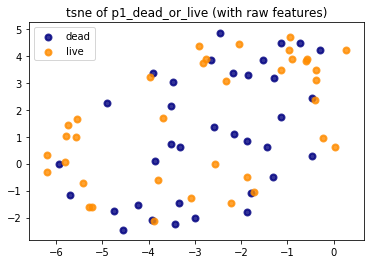

In [24]:
# visulize the x_r with t-sne, target：dead or live
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_r)
# X_embedded = TSNE(n_components=2).fit_transform(X_new) # directlt on X

colors = ['navy',  'darkorange']
target_names = ['dead','live']
# X_embedded.shape
target = '1= death; 0=alive'# 'ADT_if_fail'
Y = data_table_cont[target].values


for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_embedded[Y == i, 0], X_embedded[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('tsne of p1_dead_or_live (with raw features)')
plt.show()

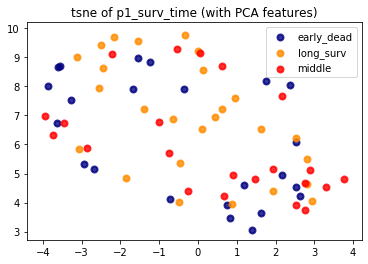

In [47]:
#  visulize the x_r with t-sne, target：surv_time
from sklearn.manifold import TSNE

target = 'gap_surv_time_class'# 'ADT_if_fail'
Y = data_table_cont[target].values


# X_embedded = TSNE(n_components=2).fit_transform(X_r)
colors = ['navy',  'darkorange', 'red']
target_names = ['early_dead','long_surv','middle']
# X_embedded.shape

for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(X_embedded[Y == i, 0], X_embedded[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('tsne of p1_surv_time (with PCA features)')
plt.show()

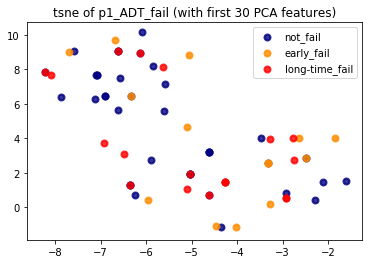

In [16]:
#  visulize the x_r with t-sne, target：ADT_fail
# from sklearn.manifold import TSNE

# target = 'ADT_start_fail'
# Y = data_table[target].values
# Y_new = np.zeros(len(Y)) 
# Y_new[np.argwhere(Y>=0)]=1
# Y_new[np.argwhere(Y>365)]=2


# # X_embedded = TSNE(n_components=2).fit_transform(X_r)
# colors = ['navy',  'darkorange', 'red']
# target_names = ['not_fail','early_fail','long-time_fail']
# # X_embedded.shape

# for color, i, target_name in zip(colors, [0.0, 1,2], target_names):
#     plt.scatter(X_embedded[Y_new == i, 0], X_embedded[Y_new == i, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('tsne of p1_ADT_fail (with first 30 PCA features)')
# plt.show()

G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

lr_acr_mean: 0.7324,lr_acr_std: 0.4427 
esnet_acr_mean: 0.7324,esnet_acr_std: 0.4427 
svm_acr_mean: 0.6479,rf_acr_mean: 0.4776 
just-mode_acr_mean: 0.0000,mode_acr_std: 0.0000 
just-random_acr_mean: 0.5634,just-random_acr_std: 0.4960 


G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
G:\anaconda\envs\pt\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

lr_acr_mean: 0.5634,lr_acr_std: 0.4960 
esnet_acr_mean: 0.5634,esnet_acr_std: 0.4960 
svm_acr_mean: 0.4507,rf_acr_mean: 0.4976 
just-mode_acr_mean: 0.0000,mode_acr_std: 0.0000 
just-random_acr_mean: 0.4930,just-random_acr_std: 0.5000 


In [14]:
X.shape

(71, 10)